In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
# Data source: https://re.jrc.ec.europa.eu - PHOTOVOLTAIC GEOGRAPHICAL INFORMATION SYSTEM 
light_df = pd.read_csv('Timeseries_46.640_32.663_SA_1kWp_crystSi_14_2a_2005_2016.csv')
de_df = pd.read_csv('Timeseries_51.510_13.898_SA_2a_2005_2016_germany.csv')

/home/val/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
light_df.time[0]

'20050101:0010'

In [4]:
light_df.columns

Index(['time', 'P', 'Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

In [5]:
rename_cols = {'time': 'time',
              'P': 'power',
              'Gb(i)': 'direct_irradiance',
              'Gd(i)': 'diffused_irradiance',
              'Gr(i)': 'reflected_irradiance',
              'H_sun': 'sun_height',
               'T2m': 'temperature',
               'WS10m': 'wind_speed',
               'Int': 'reconstructed'
              }
light_df.rename(columns=rename_cols, inplace=True)
de_df.rename(columns=rename_cols, inplace=True)
light_df.head(3)
light_df.tail(3)

,time,power,direct_irradiance,diffused_irradiance,reflected_irradiance,sun_height,temperature,wind_speed,reconstructed
0,20050101:0010,0.0,0.0,0.0,0.0,0.0,0.93,0.76,0
1,20050101:0110,0.0,0.0,0.0,0.0,0.0,0.84,0.76,0
2,20050101:0210,0.0,0.0,0.0,0.0,0.0,0.75,0.76,0


,time,power,direct_irradiance,diffused_irradiance,reflected_irradiance,sun_height,temperature,wind_speed,reconstructed
105189,20161231:2110,0.0,0.0,0.0,0.0,0.0,-6.78,2.46,0
105190,20161231:2210,0.0,0.0,0.0,0.0,0.0,-6.78,2.46,0
105191,20161231:2310,0.0,0.0,0.0,0.0,0.0,-6.78,2.46,0


In [6]:
def process_time(string):
    year = string[:4]
    month = string[4:6]
    day = string[6:8]
    hours = string[-4:-2]
    mins = string[-2:]
    return year+'/'+month+'/'+day+' '+hours+':'+mins

light_df.loc[:, 'time'] = pd.to_datetime(light_df.time.apply(process_time))
de_df = de_df.dropna()
de_df.loc[:, 'time'] = pd.to_datetime(de_df.time.apply(process_time))
light_df.head()

,time,power,direct_irradiance,diffused_irradiance,reflected_irradiance,sun_height,temperature,wind_speed,reconstructed
0,2005-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.93,0.76,0
1,2005-01-01 01:10:00,0.0,0.0,0.0,0.0,0.0,0.84,0.76,0
2,2005-01-01 02:10:00,0.0,0.0,0.0,0.0,0.0,0.75,0.76,0
3,2005-01-01 03:10:00,0.0,0.0,0.0,0.0,0.0,0.66,0.76,0
4,2005-01-01 04:10:00,0.0,0.0,0.0,0.0,0.0,0.74,0.92,0


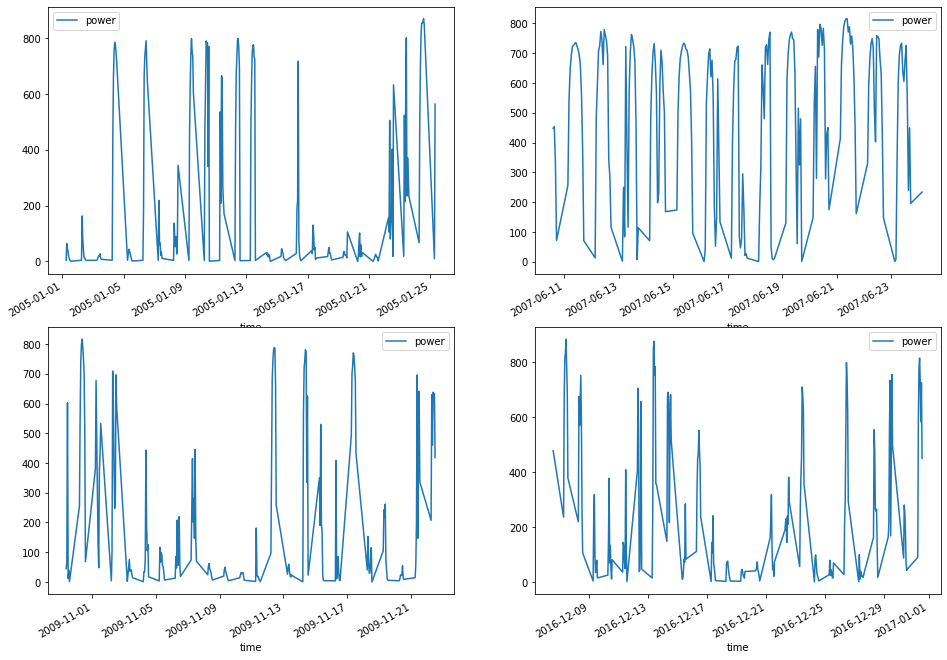

In [7]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16, 12, forward=True)
light_df[light_df.power!=0][['time', 'power']][0:200].set_index('time').plot(ax=ax[0][0]);
light_df[light_df.power!=0][['time', 'power']][10000:10200].set_index('time').plot(ax=ax[0][1]);
light_df[light_df.power!=0][['time', 'power']][20000:20200].set_index('time').plot(ax=ax[1][0]);
light_df[light_df.power!=0][['time', 'power']][-200:].set_index('time').plot(ax=ax[1][1]);

/home/val/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


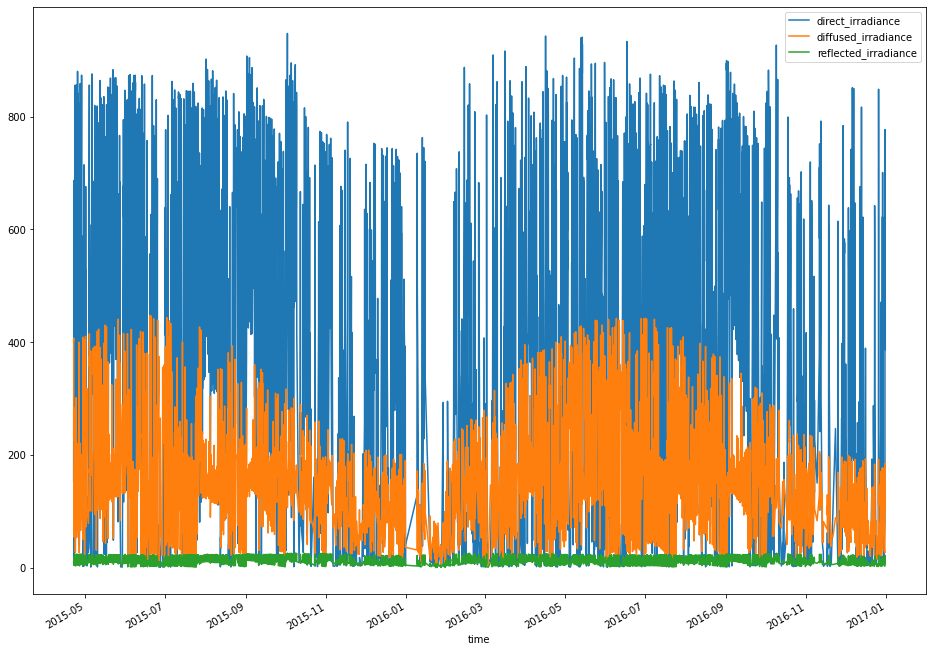

In [8]:
res_irrad = light_df[light_df['direct_irradiance']!=0]
res_irrad['hour'] = res_irrad.apply(lambda x: x['time'].hour, axis=1)

res_irrad = res_irrad[res_irrad.reconstructed==0]
res_irrad = res_irrad[res_irrad.hour>5]
res_irrad = res_irrad[res_irrad.hour<20]
res_irrad[[
    'direct_irradiance',
    'diffused_irradiance',
    'reflected_irradiance',
    'time']][-5000:].set_index(
    'time').plot(figsize=(16, 12));

In [9]:
res_irrad.describe()

,power,direct_irradiance,diffused_irradiance,reflected_irradiance,sun_height,temperature,wind_speed,reconstructed,hour
count,33924.000000,33924.000000,33924.000000,33924.000000,33924.000000,33924.000000,33924.000000,33924.0,33924.000000
mean,512.811490,445.148730,188.043683,14.898407,33.235544,16.870357,3.837106,0.0,10.532455
std,257.031552,300.913083,82.968552,6.225314,17.124136,10.525174,1.732532,0.0,3.023599
min,8.530000,1.090000,0.760000,0.280000,2.310000,-20.960000,0.040000,0.0,6.000000
25%,277.022500,127.912500,144.780000,9.770000,19.460000,8.850000,2.560000,0.0,8.000000
50%,599.725000,491.085000,182.660000,15.080000,32.540000,18.890000,3.700000,0.0,10.000000
75%,735.840000,730.300000,225.140000,20.500000,47.210000,25.410000,4.940000,0.0,13.000000
max,951.750000,992.460000,450.300000,28.250000,66.470000,38.040000,14.580000,0.0,17.000000


In [10]:
res_irrad.direct_irradiance.median()
res_irrad.direct_irradiance.mean()

491.085

445.1487301025825

In [11]:
de_df.direct_irradiance = de_df.direct_irradiance.astype(np.float32)

In [12]:
light_df['global_radiation'] = light_df.direct_irradiance + light_df.diffused_irradiance
de_df['global_radiation'] = de_df.direct_irradiance + de_df.diffused_irradiance

In [13]:
light_df = light_df[light_df.direct_irradiance!=0]
de_df = de_df[de_df.direct_irradiance!=0]

In [14]:
# percentages of reflected radiation for Kherson, Ukraine and Schipkau, Germany
100 * (light_df.reflected_irradiance/light_df.global_radiation).mean()
100 * (de_df.reflected_irradiance/de_df.global_radiation).mean()

3.202842800929268

3.573500292114404

In [15]:
light_df = light_df[['time', 'temperature', 'global_radiation']]
de_df = de_df[['time', 'temperature', 'global_radiation']]

In [16]:
if not os.path.exists('solar_rad.csv'):
    light_df.to_csv(
        'solar_rad.csv', index=False)
    
if not os.path.exists('solar_rad_de.csv'):
    de_df.to_csv(
        'solar_rad_de.csv', index=False)